In [1]:
import torch
from dataset import CcmDataset
import matplotlib.pyplot as plt
from model import Model
from tqdm.notebook import tqdm
from utils import train_one_epoch, validation
torch.manual_seed(42)
import copy

In [2]:
#import training data
train_data = CcmDataset("data/train.pkl")
validation_data = CcmDataset("data/validation.pkl")

#create torch data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=8, shuffle=False)

In [3]:
#define model
model = Model(num_rep=8, num_hidden=15) #8 and 15 are the same values that we used in homework. These can be changed as an ablation 
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
num_epochs = 20
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 5, 0.1, verbose=True)

In [4]:
#train model
train_loss = []
validation_loss = []
model_state_dicts = [] #weights for comparison
for i in range(num_epochs):
    loss = train_one_epoch(model, criterion, optimizer, device, train_loader)
    train_loss.append(loss)
    print(f" Training Loss after epoch {i} : {loss}")
    loss = validation(model, criterion, device, validation_loader)
    validation_loss.append(loss)
    model_state_dicts.append(copy.deepcopy(model.state_dict()))
    print(f" Validation Loss after epoch {i} : {loss}")
    #scheduler.step()

0it [00:00, ?it/s]

 Training Loss after epoch 0 : 0.22833364699035882
 Validation Loss after epoch 0 : 0.19846846494409773


0it [00:00, ?it/s]

 Training Loss after epoch 1 : 0.17503900583833457
 Validation Loss after epoch 1 : 0.15158513022793663


0it [00:00, ?it/s]

 Training Loss after epoch 2 : 0.13673222549259662
 Validation Loss after epoch 2 : 0.11995771196153429


0it [00:00, ?it/s]

 Training Loss after epoch 3 : 0.11060420516878366
 Validation Loss after epoch 3 : 0.09844617876741621


0it [00:00, ?it/s]

 Training Loss after epoch 4 : 0.09444023608230054
 Validation Loss after epoch 4 : 0.0864134497112698


0it [00:00, ?it/s]

 Training Loss after epoch 5 : 0.08344230137299746
 Validation Loss after epoch 5 : 0.0777210539413823


0it [00:00, ?it/s]

 Training Loss after epoch 6 : 0.0764903653645888
 Validation Loss after epoch 6 : 0.07110240848528014


0it [00:00, ?it/s]

 Training Loss after epoch 7 : 0.0710825168993324
 Validation Loss after epoch 7 : 0.0647846327887641


0it [00:00, ?it/s]

 Training Loss after epoch 8 : 0.06687975940294563
 Validation Loss after epoch 8 : 0.061294883489608765


0it [00:00, ?it/s]

 Training Loss after epoch 9 : 0.06345146698877216
 Validation Loss after epoch 9 : 0.05766672765215238


0it [00:00, ?it/s]

 Training Loss after epoch 10 : 0.06032304542604834
 Validation Loss after epoch 10 : 0.05485897262891134


0it [00:00, ?it/s]

 Training Loss after epoch 11 : 0.05756058988627046
 Validation Loss after epoch 11 : 0.05133546681867705


0it [00:00, ?it/s]

 Training Loss after epoch 12 : 0.055231245583854616
 Validation Loss after epoch 12 : 0.049796297732326716


0it [00:00, ?it/s]

 Training Loss after epoch 13 : 0.05263573175761849
 Validation Loss after epoch 13 : 0.046589904775222145


0it [00:00, ?it/s]

 Training Loss after epoch 14 : 0.05091552934609354
 Validation Loss after epoch 14 : 0.044620280671450824


0it [00:00, ?it/s]

 Training Loss after epoch 15 : 0.049231602938380095
 Validation Loss after epoch 15 : 0.04319890754090415


0it [00:00, ?it/s]

 Training Loss after epoch 16 : 0.04790703791659325
 Validation Loss after epoch 16 : 0.0413938524822394


0it [00:00, ?it/s]

 Training Loss after epoch 17 : 0.04659706496167928
 Validation Loss after epoch 17 : 0.04122141645186477


0it [00:00, ?it/s]

 Training Loss after epoch 18 : 0.045837617421057075
 Validation Loss after epoch 18 : 0.039255835529830724


0it [00:00, ?it/s]

 Training Loss after epoch 19 : 0.04409573915181682
 Validation Loss after epoch 19 : 0.03871762131651243


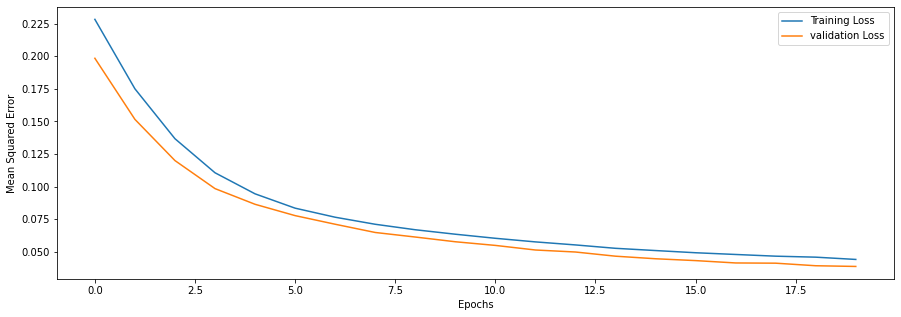

In [5]:
#plot loss curve
plt.figure(figsize=(15,5))
plt.plot(list(range(num_epochs)), train_loss, label = "Training Loss")
plt.plot(list(range(num_epochs)), validation_loss, label = "validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [7]:
#save models for testing
torch.save(model_state_dicts[::4], "models/model.pt")